In [0]:
#Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
#DOWNLOADING KAGGLE DATASET INTO COLAB
from google.colab import files
files.upload()

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d evernext10/hand-gesture-of-the-colombian-sign-language

Saving kaggle.json to kaggle.json
100% 21.9G/21.9G [06:11<00:00, 49.9MB/s]
100% 21.9G/21.9G [06:11<00:00, 63.4MB/s]


In [0]:
from zipfile import ZipFile
file_name="hand-gesture-of-the-colombian-sign-language.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("DONE")

DONE


In [15]:
#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/dataset/dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if path.endswith("JPG"):
            imagepaths.append(path)
print(len(imagepaths))

3325


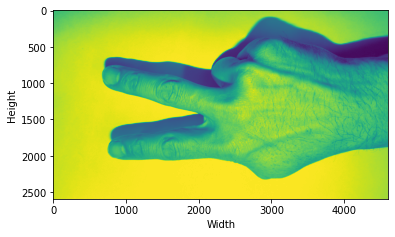

In [17]:
def img_plot(path):
  img=cv2.imread(path)
  #convert to RGB space
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_rgb)
  plt.xlabel("Width")
  plt.ylabel("Height")

img_plot(imagepaths[509])

In [18]:
#### Creating Training Set and Labels ####
# X for image data
X = []
# y for the labels
y = []

#Load the images into X by doing the necessary conversions and resizing of images
#Resizing is done to reduce the size of image to increase the speed of training
for i in range(len(imagepaths)):
    path=imagepaths[i]
    img = cv2.imread(path)
    if type(img)==type(None):
      continue
    else:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
      img = cv2.resize(img, (128,128))
      X.append(img)  
      #Getting the labels from the image path
      y_lab=imagepaths[i][31]
      if y_lab=='0' or y_lab=='1' or y_lab=='2' or y_lab=='3' or y_lab=='4' or y_lab=='5':
        label=int(y_lab)
      elif y_lab=='A':
        label=6
      elif y_lab=='E':
        label=7
      elif y_lab=='I':
        label=8
      elif y_lab=='O':
        label=9
      else :
        label=10
      y.append(label)

#Turning X & y into numpy arrays
X = np.array(X)
X = X.reshape(len(X), 128,128,1)
y = np.array(y)

print(X.shape)
print(y.shape)


(3319, 128, 128, 1)
(3319,)


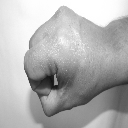

--------------------------------- 0 




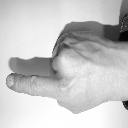

--------------------------------- 1 




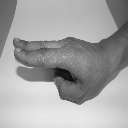

--------------------------------- 2 




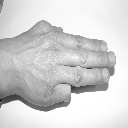

--------------------------------- 3 




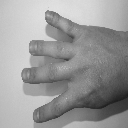

--------------------------------- 4 




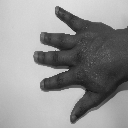

--------------------------------- 5 




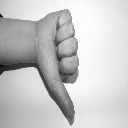

--------------------------------- A 




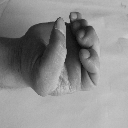

--------------------------------- E 




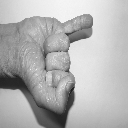

--------------------------------- I 




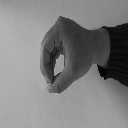

--------------------------------- O 




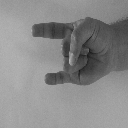

--------------------------------- U 




In [45]:
for i in range(11):
  for j in range(X.shape[0]):
    if y[j]==i:
      cv2_imshow(X[j])
      if y[j]==6:
        k='A'
      elif y[j]==7:
        k='E'
      elif y[j]==8:
        k='I'
      elif y[j]==9:
        k='O'
      elif y[j]==10:
        k='U'
      else:
        k=y[j]
      print("---------------------------------",k,"\n\n")
      break
    else:
      continue


In [46]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(2323, 128, 128, 1)
(2323,)


In [0]:
# Create a CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

In [0]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2,validation_data=(X_test, y_test))

Train on 2323 samples, validate on 996 samples
Epoch 1/15
 - 76s - loss: 1.4309 - accuracy: 0.4920 - val_loss: 1.2098 - val_accuracy: 0.5773
Epoch 2/15
 - 75s - loss: 1.2292 - accuracy: 0.5510 - val_loss: 1.2293 - val_accuracy: 0.5673
Epoch 3/15
 - 75s - loss: 1.0907 - accuracy: 0.6065 - val_loss: 1.0810 - val_accuracy: 0.6135
Epoch 4/15
 - 75s - loss: 0.8752 - accuracy: 0.6832 - val_loss: 1.1362 - val_accuracy: 0.6255
Epoch 5/15
 - 75s - loss: 0.7986 - accuracy: 0.7228 - val_loss: 1.2948 - val_accuracy: 0.5753
Epoch 6/15
 - 75s - loss: 0.7151 - accuracy: 0.7365 - val_loss: 1.0052 - val_accuracy: 0.6596
Epoch 7/15
 - 76s - loss: 0.5728 - accuracy: 0.7899 - val_loss: 0.9117 - val_accuracy: 0.6988
Epoch 8/15
 - 76s - loss: 0.4922 - accuracy: 0.8265 - val_loss: 0.9346 - val_accuracy: 0.6878
Epoch 9/15
 - 76s - loss: 0.4021 - accuracy: 0.8562 - val_loss: 1.0480 - val_accuracy: 0.6968
Epoch 10/15
 - 76s - loss: 0.3574 - accuracy: 0.8627 - val_loss: 1.1500 - val_accuracy: 0.6606
Epoch 11/15


In [58]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

996/996 [==============================] - 9s 9ms/step
Test accuracy: 69.38%


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/gesture_detection/DATA2_mod1.h5')

In [0]:
y_pred=np.argmax(model.predict(X_test),axis=1) # Make predictions towards the test set

In [60]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["0","1","2","3","4","5","A","E","I","O","U"],
             index=["0","1","2","3","4","5","A","E","I","O","U"])

,0,1,2,3,4,5,A,E,I,O,U
0,54,5,1,0,0,0,3,3,2,23,0
1,1,63,21,1,0,0,2,0,0,0,1
2,0,10,46,26,1,0,0,0,2,0,0
3,0,2,12,63,7,8,0,0,0,0,2
4,0,0,4,19,60,12,0,0,0,0,0
5,0,1,1,2,5,85,0,1,0,0,1
A,2,1,1,1,1,1,63,3,6,2,3
E,1,2,0,7,1,2,4,65,1,4,1
I,2,7,2,0,0,1,2,2,77,1,3
O,26,0,0,0,0,2,4,8,1,50,0
